In [20]:
from tree import Criterion, DecisionTree, TreeNode, RandomForest

from sklearn.datasets import load_diabetes, make_regression, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score

import numpy as np
import pandas as pd
from time import perf_counter
from tqdm import tqdm
from multiprocessing import Pool
import pickle

import matplotlib
import matplotlib.pyplot as plt
import matplotlib_inline
%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')

import sys
sys.setrecursionlimit(10000)

In [87]:
matplotlib.rcParams.update({'font.size': 12})

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
def test_model(model, X, y, n_iter=10, pbar=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    preds = []
    for i in tqdm(range(n_iter)):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        # preds.append(np.sum((y_test - y_pred) ** 2) ** 0.5)
        preds.append(r2_score(y_test, y_pred))

        if pbar is not None:
            pbar.update(1)
        
    return preds

# Diabetes

In [78]:
np.random.seed(42)

X, y = load_diabetes(return_X_y=True)

model = RandomForestRegressor(n_estimators=100, max_depth=7, max_features=X.shape[1] // 3, min_samples_leaf=5)
sklearn_preds = test_model(model, X, y)
print(f"Sklearn: {np.mean(sklearn_preds)} +- {np.var(sklearn_preds)}")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 12.37it/s]

Sklearn: 0.4654080718169654 +- 8.350275707754527e-05


In [ ]:
mu_list = [0.05, 0.1, 0.2, 0.3]
def f(mu):
    model = RandomForest(n_estimators=100, mu=mu, max_depth=7, max_features=X.shape[1] // 3, min_samples_leaf=5)
    preds = test_model(model, X, y, n_iter=10)
    print(f"mu = {mu}: {np.mean(preds)} +- {np.var(preds)}")
    return preds

with Pool(processes=len(mu_list)) as p:
    model_preds = p.map(f, mu_list)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.94it/s]

Sklearn: 0.4654080718169654 +- 8.350275707754527e-05



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [02:03<00:00, 12.39s/it]


mu = 0.05: 0.47155583675730783 +- 9.048626511990039e-05


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [02:08<00:00, 12.80s/it]


mu = 0.1: 0.47187722288774203 +- 1.7502458575957267e-05


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [02:08<00:00, 12.82s/it]


mu = 0.2: 0.4415981781941989 +- 0.00010566681651595065


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [02:11<00:00, 13.14s/it]


mu = 0.3: 0.3085679434980438 +- 0.0005086324064169014


In [24]:
with open("diabetes.pkl", "wb") as file:
    pickle.dump(model_preds, file)

In [79]:
with open("diabetes.pkl", "rb") as file:
    model_preds = pickle.load(file)

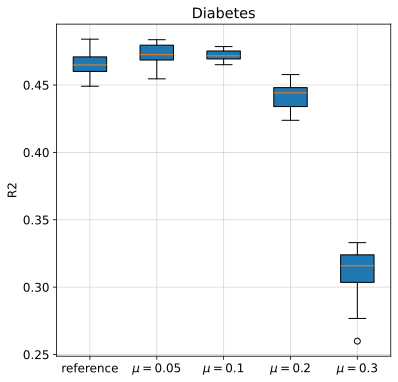

In [89]:
plt.figure(figsize=(6, 6))
plt.boxplot(
    [sklearn_preds] + model_preds,
    patch_artist=True,
    labels=['reference'] + [rf'$\mu = {mu}$' for mu in mu_list]
);
plt.ylabel("R2")
plt.title("Diabetes")
plt.grid(alpha=0.5)
plt.savefig("../report/img/diabetes.svg")

# Synthetic

In [90]:
np.random.seed(42)

X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, noise=1, random_state=42)

model = RandomForestRegressor(n_estimators=100, max_depth=7, max_features=X.shape[1] // 3, min_samples_leaf=5)
sklearn_preds = test_model(model, X, y)
print(f"Sklearn: {np.mean(sklearn_preds)} +- {np.var(sklearn_preds)}")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.69it/s]

Sklearn: 0.864940358250144 +- 4.777393628197428e-05


In [ ]:
mu_list = [0.05, 0.1, 0.2, 0.3]
def f(mu):
    model = RandomForest(n_estimators=100, mu=mu, max_depth=7, max_features=X.shape[1] // 3, min_samples_leaf=5)
    preds = test_model(model, X, y, n_iter=10)
    print(f"mu = {mu}: {np.mean(preds)} +- {np.var(preds)}")
    return preds

with Pool() as p:
    model_preds = p.map(f, mu_list)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.21it/s]

Sklearn: 0.864940358250144 +- 4.777393628197428e-05



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [09:15<00:00, 55.59s/it]


mu = 0.3: 0.8518728392359124 +- 0.00012036088319105673


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [09:23<00:00, 56.31s/it]


mu = 0.2: 0.925059746949251 +- 9.009558980534504e-06


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [09:25<00:00, 56.53s/it]


mu = 0.1: 0.9026829382963812 +- 1.5891765959466735e-05


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [09:30<00:00, 57.08s/it]


mu = 0.05: 0.8860916880699193 +- 7.59276650226999e-06


In [27]:
with open("synthetic.pkl", "wb") as file:
    pickle.dump(model_preds, file)

In [91]:
with open("synthetic.pkl", "rb") as file:
    model_preds = pickle.load(file)

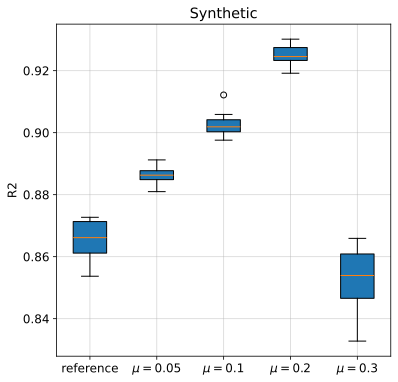

In [93]:
plt.figure(figsize=(6, 6))
plt.boxplot(
    [sklearn_preds] + model_preds,
    patch_artist=True,
    labels=['reference'] + [rf'$\mu = {mu}$' for mu in mu_list]
);
plt.ylabel("R2")
plt.title("Synthetic")
plt.grid(alpha=0.5)
plt.savefig("../report/img/synthetic.svg")

# California housing

In [94]:
np.random.seed(42)

X, y = fetch_california_housing(return_X_y=True)

model = RandomForestRegressor(n_estimators=100, max_depth=7, max_features=X.shape[1] // 3, min_samples_leaf=5)
sklearn_preds = test_model(model, X, y)
print(f"Sklearn: {np.mean(sklearn_preds)} +- {np.var(sklearn_preds)}")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:12<00:00,  1.28s/it]

Sklearn: 0.6993113763575312 +- 3.0770176270006688e-06


In [ ]:
mu_list = [0.05, 0.1, 0.2, 0.3]
def f(mu):
    model = RandomForest(n_estimators=100, mu=mu, max_depth=7, max_features=X.shape[1] // 3, min_samples_leaf=5)
    preds = test_model(model, X, y, n_iter=10)
    print(f"mu = {mu}: {np.mean(preds)} +- {np.var(preds)}")
    return preds

with Pool() as p:
    model_preds = p.map(f, mu_list)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:13<00:00,  1.31s/it]

Sklearn: 0.6993113763575312 +- 3.0770176270006688e-06



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [2:00:07<00:00, 720.77s/it]


mu = 0.3: 0.632799378332043 +- 6.066992464164325e-05


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [2:01:34<00:00, 729.48s/it]


mu = 0.2: 0.7242770244306123 +- 9.36107789236484e-06


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [2:01:59<00:00, 731.91s/it]


mu = 0.1: 0.7184505975540577 +- 1.0176838228011528e-05


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [2:02:29<00:00, 734.91s/it]


mu = 0.05: 0.7090687264834976 +- 7.543808177515641e-06


In [30]:
with open("california_housing.pkl", "wb") as file:
    pickle.dump(model_preds, file)

In [95]:
with open("california_housing.pkl", "rb") as file:
    model_preds = pickle.load(file)

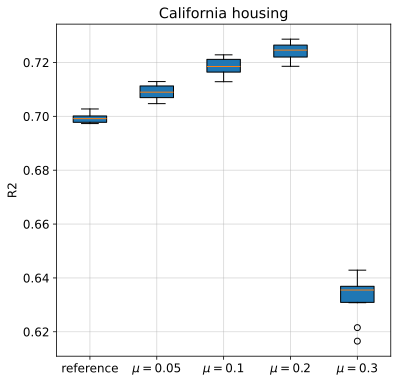

In [97]:
plt.figure(figsize=(6, 6))
plt.boxplot(
    [sklearn_preds] + model_preds,
    patch_artist=True,
    labels=['reference'] + [rf'$\mu = {mu}$' for mu in mu_list]
)
plt.ylabel("R2")
plt.title("California housing")
plt.grid(alpha=0.5)
plt.savefig("../report/img/california_housing.svg")

# Boston

In [24]:
np.random.seed(42)

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

model = RandomForestRegressor(n_estimators=100, max_depth=7, max_features=X.shape[1] // 3, min_samples_leaf=5)
sklearn_preds = test_model(model, X, y)
print(f"Sklearn: {np.mean(sklearn_preds)} +- {np.var(sklearn_preds)}")

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_16722/1704953961.py:4: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
100%|██████████| 10/10 [00:00<00:00, 10.20it/s]

Sklearn: 0.8222730893041799 +- 3.548427964997135e-05


In [25]:
mu_list = [0.05, 0.1, 0.2, 0.3]
def f(mu):
    model = RandomForest(n_estimators=100, mu=mu, max_depth=7, max_features=X.shape[1] // 3, min_samples_leaf=5)
    preds = test_model(model, X, y, n_iter=10)
    print(f"mu = {mu}: {np.mean(preds)} +- {np.var(preds)}")
    return preds

with Pool() as p:
    model_preds = p.map(f, mu_list)

100%|██████████| 10/10 [03:24<00:00, 20.49s/it]


mu = 0.05: 0.8353033983584149 +- 2.6504698446267303e-05


100%|██████████| 10/10 [03:28<00:00, 20.89s/it]


mu = 0.2: 0.8186788874455697 +- 5.234107167223148e-05


100%|██████████| 10/10 [03:33<00:00, 21.36s/it]


mu = 0.3: 0.618884603722814 +- 0.0003169885438054918


100%|██████████| 10/10 [03:34<00:00, 21.42s/it]


mu = 0.1: 0.8415703381057906 +- 3.580299131639019e-05


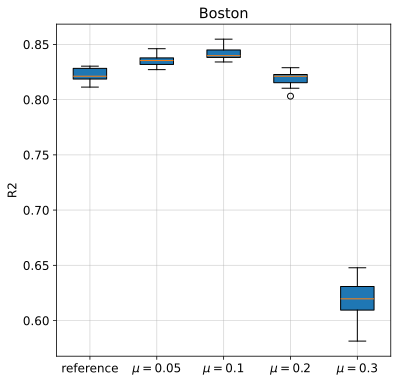

In [26]:
plt.figure(figsize=(6, 6))
plt.boxplot(
    [sklearn_preds] + model_preds,
    patch_artist=True,
    labels=['reference'] + [rf'$\mu = {mu}$' for mu in mu_list]
)
plt.ylabel("R2")
plt.title("Boston")
plt.grid(alpha=0.5)
plt.savefig("../figures/boston.svg")